# Insurance Claim Fraud Detection

## Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

## Independent Variables

1. months_as_customer: Number of months of patronage
2. age: the length of time a customer has lived or a thing has existed
3. policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4. policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5. policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6. policy_csl: is basically Combined Single Limit
7. policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8. policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9. umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10. insured_zip: It is the zip code where the insurance was made
11. insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12. insured_education_level: This refers to the Level of education of the customer
13. insured_occupation: This refers Occupation of the customer
14. insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15. insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16. capital-gains: This refers to profit accrued due to insurance premium
17. capital-loss: This refers to the losses incurred due to insurance claims
18. incident_date: This refers to the date which claims where made by customers
19. incident_type: This refers to the type of claim/vehicle damage made by customer
20. collision_type: This refers to the area of damage on the vehicle
21. incident_severity: This refers to the extent/level of damage
22. authorities_contacted: This refers to the government agencies that were contacted after damage
23. incident_state: This refers to the state at which the accident happened
24. incident_city: This refers to the city at which the accident happened
25. 1ncident_location: This refers to the location at which the accident happened
26. incident_hour_of_the_day: The period of the day which accident took place
27. number_of_vehicles_involved: This refers to number of vehicles involved the accident
28. property_damage: This refers to whether property was damaged or not
29. bodily_injuries: This refers to injuries sustained
30. witnesses: This refers to the number of witnesses involved
31. police_report_available: This refers to whether the report on damage was documented or not
32. total_claim_amount: This refers to the financial implications involved in claims
33. injury_claim: This refers to physical injuries sustained
34. property_claim: This refers to property damages during incident
35. vehicle_claim: This refers to property damages during incident
36. auto_make: This refers to the make of the vehicle
37. auto_model: This refers to the model of the vehicle
38. auto_year: This refers to the year which the vehicle was manufactured
39. _c39:
40. fraud_reported

## Dataset Link-
https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv


In [1]:
# Import Important libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
print('No of Rows:',df.shape[0])
print('No of columns:',df.shape[1])
pd.set_option('display.max_columns', None)
df.head()

No of Rows: 1000
No of columns: 40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
# Short columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Analysis of Statistical Views

#### Sience datasets is Large, lets check repeated values and duplicate values 

In [8]:
df.duplicated('policy_number').sum()

0

#### Lets check if any whitespace, NA, or "-" exist in datasets

In [10]:
df.isin([' ','NA','-']).sum().any()

False

In [12]:
df.isin(['?']).sum().any()

True

#### Lets replace '?' with np.NaN

In [13]:
df=df.replace('?',np.NaN)

# Missing Value check

In [14]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
authorities_contacted                    91             9.1
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
total_claim_amount                        0             0.0
injury_claim                            

* 'property_damage','police_report_available' and 'collision_type' data is Missing values
* _c39 in this columns 100% data missing so that we can drop it.
* Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.

# Missing values imputation

In [16]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [17]:
# Droping Unnecessary columns
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

# Missing Values checking after imputation

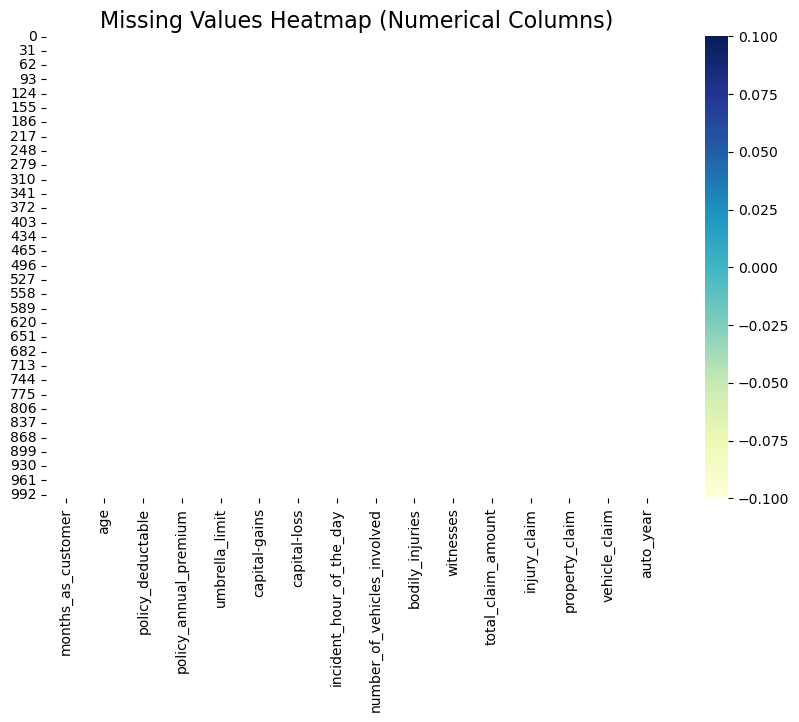

In [23]:
# Heatmap of missing values
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,6))
sns.heatmap(numerical_cols.isnull(), cmap="YlGnBu", linewidths=0.5)
plt.title("Missing Values Heatmap (Numerical Columns)", fontsize=16)
plt.show()

* There is no missing values present in this dataset

# Checking DataType

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      